# Image Recognition Using PCA
### Authors : Sravanth Chowdary Potluri,Nischal Pradyoth Vaddadi,Madati Sasank,Avinash Changrani

In [129]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# reading the csv which has image name and label
df = pd.read_csv('label.csv')

df.head()

,Number,Id,Label
0,0,IMG_1118.JPG,0
1,1,IMG_1128.JPG,0
2,2,IMG_1138.JPG,0
3,3,IMG_1148.JPG,0
4,4,IMG_1158.JPG,0


In [131]:
# dropping the number column from the dataframe
df = df.drop('Number', axis=1)

df.head()

,Id,Label
0,IMG_1118.JPG,0
1,IMG_1128.JPG,0
2,IMG_1138.JPG,0
3,IMG_1148.JPG,0
4,IMG_1158.JPG,0


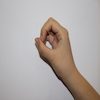

In [132]:
# displaying an image from the given path
from PIL import Image
img = Image.open('./Sign-Language-Digits-Dataset/' + str(df['Label'][0]) + '/' + str(df['Id'][0]))
img

In [ ]:
# getting and storing resolutions of all images in res
res = []
for i in range(len(df)):
    img = Image.open('./Sign-Language-Digits-Dataset/'+str(df['Label'][i]) + '/' + str(df['Id'][i]))
    res.append(img.size)

res

In [134]:
# appending the image size to the dataframe
df['size'] = res

In [135]:
# displaying the number of images in each class
df['size'].value_counts()

(100, 100)      2059
(3024, 3024)       3
Name: size, dtype: int64

In [136]:
# dropping the images with size (3024,3024)
df = df[df['size'] != (3024, 3024)]
df['size'].value_counts()

(100, 100)    2059
Name: size, dtype: int64

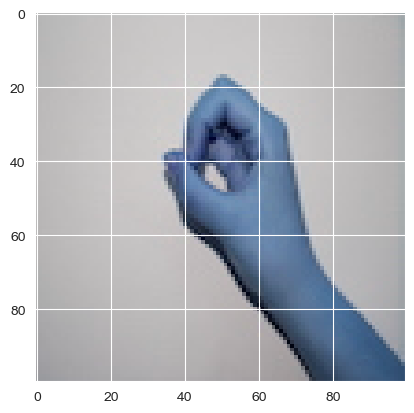

In [137]:
# displaying an image using opencv
import cv2
img = cv2.imread('./Sign-Language-Digits-Dataset/' + str(df['Label'][0]) + '/' + str(df['Id'][0]))
plt.imshow(img)

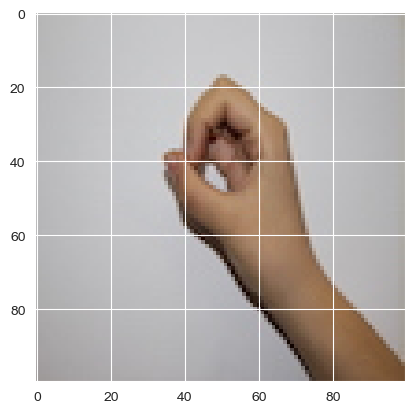

In [138]:
# fixing the colour channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [139]:
# getting all the images from the folder
import os
# getting all the images from the folder
images = []
for i in range(len(df)):
    img = cv2.imread('./Sign-Language-Digits-Dataset/'+ str(df['Label'].iloc[i]) + '/' + str(df['Id'].iloc[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
# print(images)

In [140]:
# # slicing the first 10 images
# images = images[:10]

# images

In [141]:
# converting all the images to grayscale
gray_images = []
for i in range(len(images)):
    gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

(100, 100)


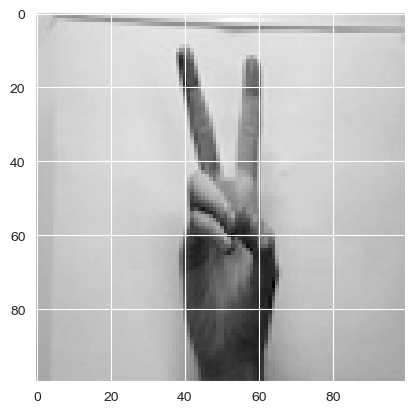

In [142]:
# showing a random image
plt.imshow(gray_images[420], cmap='gray')
# show the dimensions of the image
print(gray_images[420].shape)

In [ ]:
# adding the images to the dataframe
df['Images'] = gray_images

df

In [144]:
# splitting the dataframe into train and test from the dataframe
# importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['Images'],df['Label'], test_size = 0.25, random_state = 42)

In [145]:
# displaying the train and test dataframes
print(X_train)
print(X_test)
print(y_train)
print(y_test)

439     [[140, 142, 141, 145, 146, 144, 149, 149, 149,...
271     [[137, 136, 137, 140, 143, 145, 148, 150, 155,...
244     [[139, 142, 143, 145, 149, 151, 153, 156, 156,...
998     [[101, 103, 105, 107, 108, 109, 111, 112, 113,...
1854    [[124, 125, 127, 129, 131, 133, 135, 136, 141,...
                              ...                        
1639    [[122, 123, 125, 126, 127, 128, 130, 131, 132,...
1095    [[125, 127, 129, 130, 130, 129, 130, 132, 132,...
1130    [[148, 151, 153, 155, 158, 160, 162, 165, 165,...
1294    [[128, 129, 130, 132, 133, 135, 137, 138, 140,...
860     [[147, 149, 151, 153, 154, 155, 158, 160, 160,...
Name: Images, Length: 1544, dtype: object
1298    [[123, 126, 127, 128, 131, 133, 135, 138, 141,...
591     [[96, 97, 99, 100, 102, 104, 106, 108, 108, 11...
1318    [[123, 124, 126, 128, 129, 131, 133, 133, 135,...
1067    [[144, 146, 149, 151, 153, 154, 155, 156, 156,...
29      [[136, 138, 140, 142, 145, 147, 149, 151, 153,...
                              

In [146]:
# flattening the images
X_train = [i.flatten() for i in X_train]
X_test = [i.flatten() for i in X_test]

In [147]:
# displaying the unique shapes of the images
print(np.unique([i.shape for i in X_train]))
print(np.unique([i.shape for i in X_test]))

[10000]
[10000]


In [ ]:
X_train

In [149]:
# implementing pca on the train data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

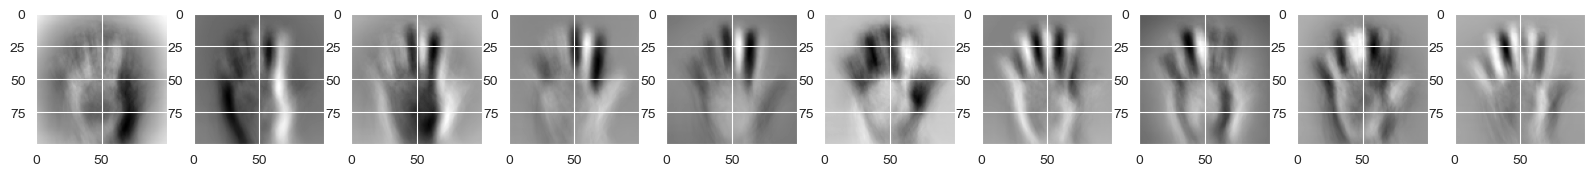

In [150]:
# showing the eigenfaces
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pca.components_[i].reshape(100, 100), cmap='gray')

In [151]:
print(pca.n_components_)

537


In [152]:
# transforming the train and test data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [153]:
# applying 1-NN on the train and test data
# importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [154]:
# predicting the test data
y_pred = knn.predict(X_test)

<AxesSubplot: >

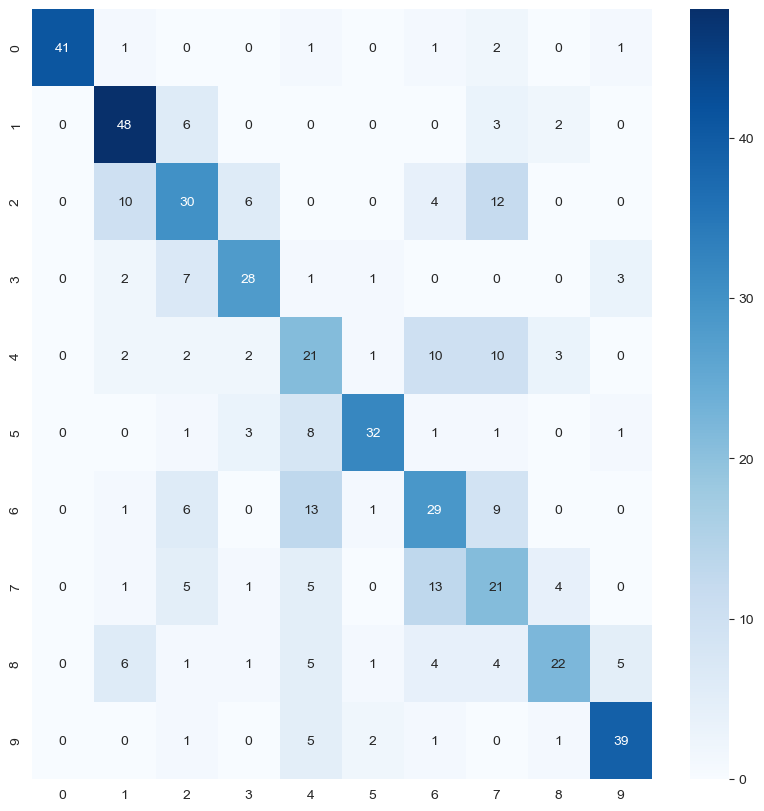

In [155]:

# display the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


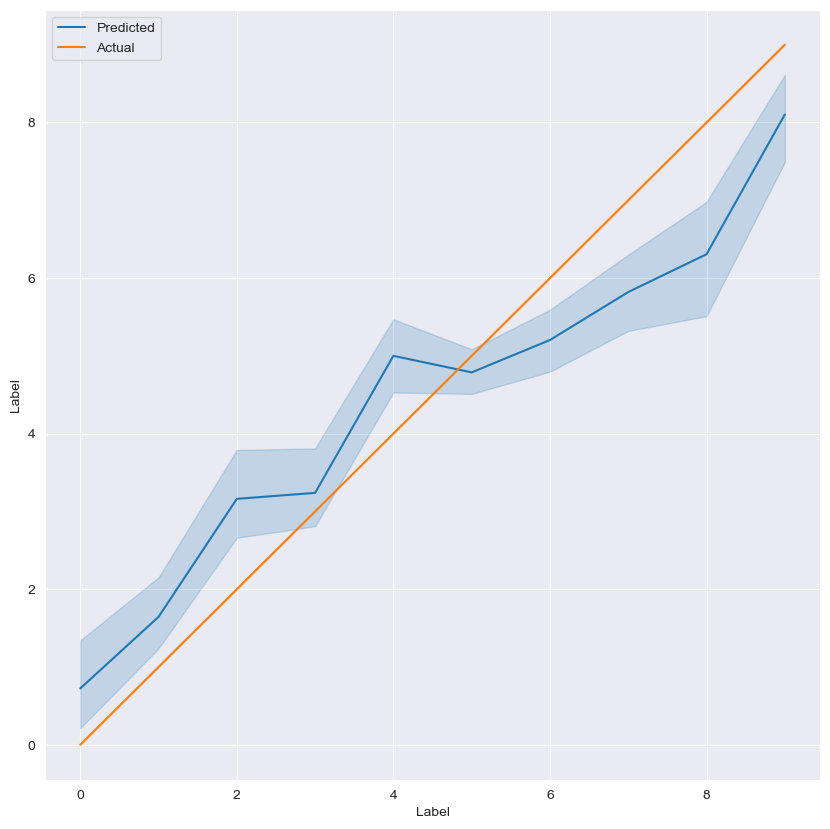

In [156]:
# actual vs predicted values
plt.figure(figsize=(10, 10))
sns.lineplot(x=y_test, y=y_pred, label='Predicted')
sns.lineplot(x=y_test, y=y_test, label='Actual')
plt.legend()

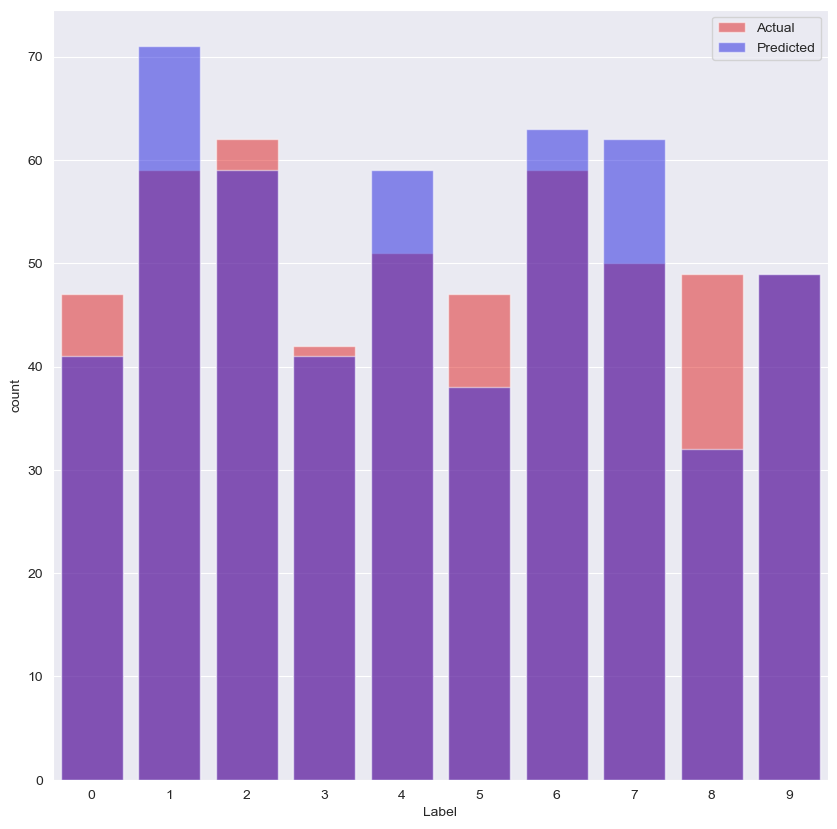

In [157]:
# plot the bar plot between count of actual and predicted labels
plt.figure(figsize=(10, 10))
sns.countplot(x=y_test, label='Actual', color='red', alpha=0.5)
sns.countplot(x=y_pred, label='Predicted', color='blue', alpha=0.5)
plt.legend()

In [158]:
# displaying the accuracy
print(knn.score(X_test, y_test))

0.6038834951456311


In [159]:
# applying logistic regression on the train and test data
# importing the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
y_pred = log_reg.predict(X_test)

In [161]:
print(log_reg.score(X_test, y_test))

0.7223300970873786


In [162]:
# function to return accuracy in 1-NN and Logistic Regression
def accuracy(image, label,n_components=0.95,n_neighbors=1):
    # dividing the dataframe into train and test from the dataframe
    # importing the train_test_split from sklearn
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        image,label, test_size = 0.25, random_state = 42)
    # flattening the images
    X_train = [i.flatten() for i in X_train]
    X_test = [i.flatten() for i in X_test]
    # implementing pca on the train data
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    # transforming the train and test data
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    # applying 1-NN on the train and test data
    # importing the KNeighborsClassifier from sklearn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # predicting the test data
    y_pred = knn.predict(X_test)
    # displaying the accuracy
    #print('1-NN Accuracy: ', knn.score(X_test, y_test))
    # applying logistic regression on the train and test data
    # importing the LogisticRegression from sklearn
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    #print('Logistic Regression Accuracy: ', log_reg.score(X_test, y_test))
    return (knn.score(X_test, y_test), log_reg.score(X_test, y_test))


In [163]:
# picking 2 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(2).tolist()
knn_2_accuracy, log_reg_2_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_2_accuracy, log_reg_2_accuracy)


0.9313725490196079 0.9607843137254902


In [164]:
# picking 4 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(4).tolist()
knn_4_accuracy, log_reg_4_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_4_accuracy, log_reg_4_accuracy)

0.8838709677419355 0.9225806451612903


In [165]:
# picking 6 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(6).tolist()
knn_6_accuracy, log_reg_6_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_6_accuracy, log_reg_6_accuracy)

0.7161290322580646 0.8709677419354839


In [166]:
# picking 8 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(8).tolist()
knn_8_accuracy, log_reg_8_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_8_accuracy, log_reg_8_accuracy)

0.6941747572815534 0.7912621359223301


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
# picking 10 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(10).tolist()
knn_10_accuracy, log_reg_10_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_10_accuracy, log_reg_10_accuracy)

0.6204986149584487 0.7728531855955678


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


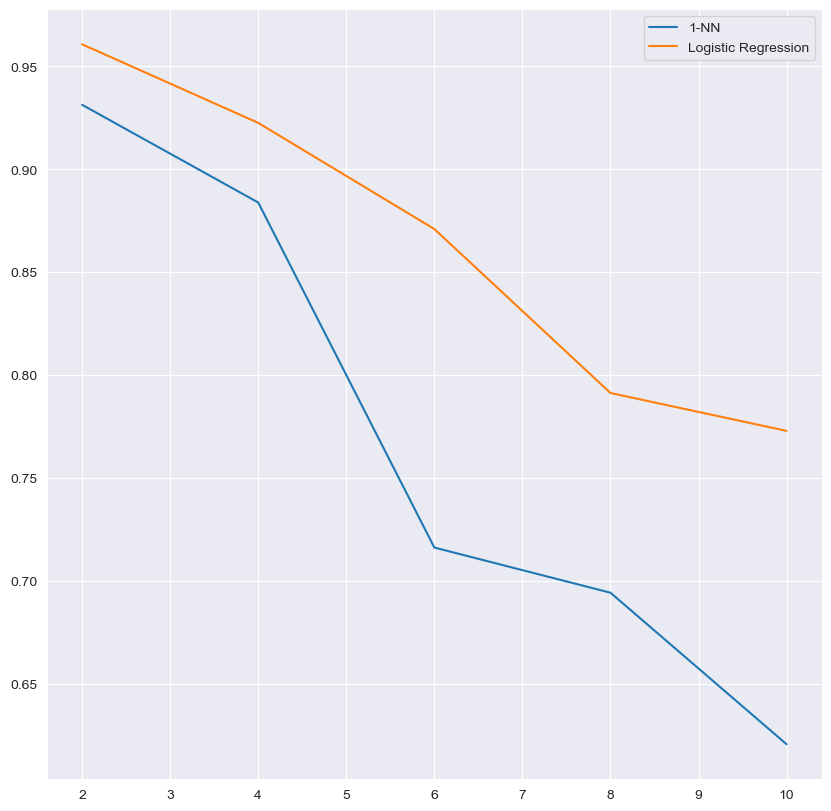

In [168]:
# plotting the accuracy of 1-NN and Logistic Regression
plt.figure(figsize=(10, 10))
sns.lineplot(x=[2, 4, 6, 8, 10], y=[knn_2_accuracy, knn_4_accuracy, knn_6_accuracy, knn_8_accuracy, knn_10_accuracy], label='1-NN')
sns.lineplot(x=[2, 4, 6, 8, 10], y=[log_reg_2_accuracy, log_reg_4_accuracy, log_reg_6_accuracy, log_reg_8_accuracy, log_reg_10_accuracy], label='Logistic Regression')
plt.legend()
plt.show()

In [169]:
# picking 2 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(2).tolist()
knn_2_accuracy, log_reg_2_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_2_accuracy, log_reg_2_accuracy)


0.941747572815534 0.970873786407767


In [170]:
# picking 4 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(4).tolist()
knn_4_accuracy, log_reg_4_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_4_accuracy, log_reg_4_accuracy)

0.8019323671497585 0.8309178743961353


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
# picking 6 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(6).tolist()
knn_6_accuracy, log_reg_6_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_6_accuracy, log_reg_6_accuracy)

0.883495145631068 0.8349514563106796


In [172]:
# picking 8 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(8).tolist()
knn_8_accuracy, log_reg_8_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_8_accuracy, log_reg_8_accuracy)

0.7184466019417476 0.8187702265372169


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
# picking 10 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(10).tolist()
knn_10_accuracy, log_reg_10_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_10_accuracy, log_reg_10_accuracy)

0.7131782945736435 0.7906976744186046


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


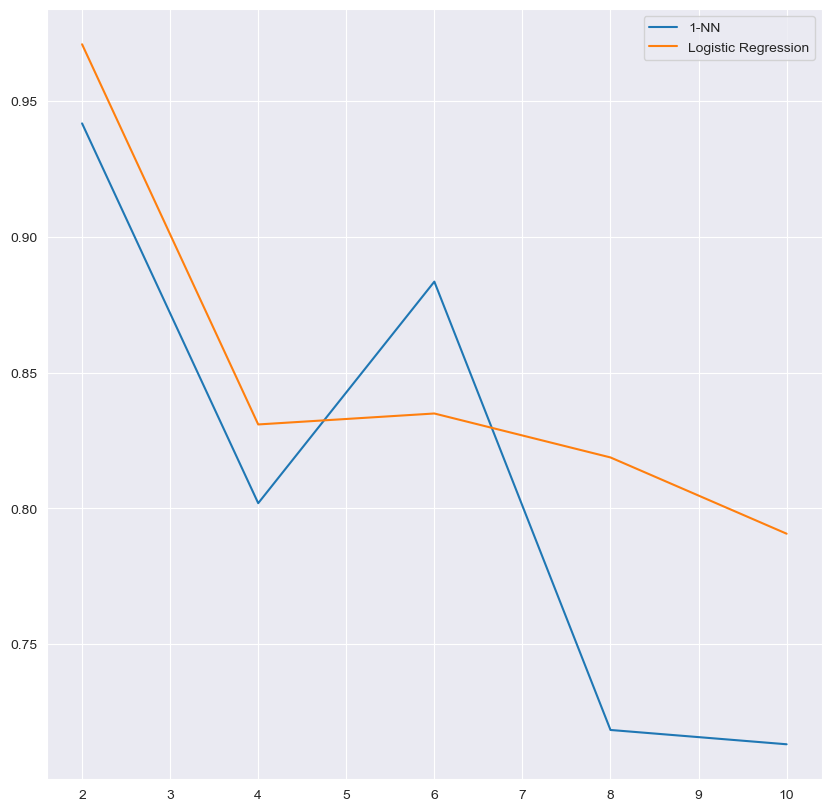

In [174]:
# plotting the accuracy of 1-NN and Logistic Regression
plt.figure(figsize=(10, 10))
sns.lineplot(x=[2, 4, 6, 8, 10], y=[knn_2_accuracy, knn_4_accuracy, knn_6_accuracy, knn_8_accuracy, knn_10_accuracy], label='1-NN')
sns.lineplot(x=[2, 4, 6, 8, 10], y=[log_reg_2_accuracy, log_reg_4_accuracy, log_reg_6_accuracy, log_reg_8_accuracy, log_reg_10_accuracy], label='Logistic Regression')
plt.legend()
plt.show()

In [ ]:
# applying the function for different number of components and storing the accuracies in a list
accuracy_list=[]
for i in range(1,100):
    accuracy_list.append(accuracy(df['Images'], df['Label'], i))

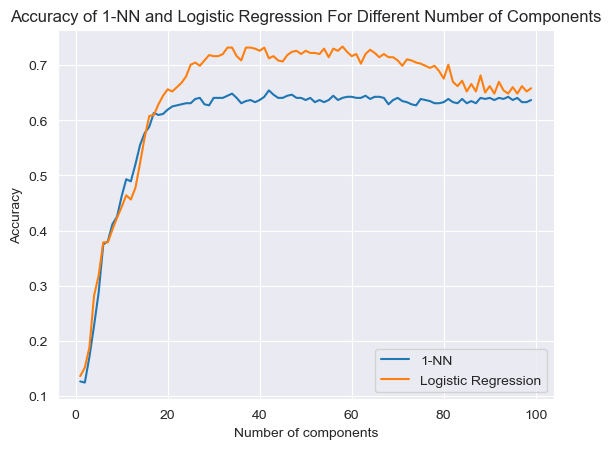

In [176]:
# plotting the accuracy of 1-NN and Logistic Regression for different number of components
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,100)], [i[0] for i in accuracy_list], label='1-NN')
plt.plot([i for i in range(1,100)], [i[1] for i in accuracy_list], label='Logistic Regression')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN and Logistic Regression For Different Number of Components')
plt.legend()
plt.show()

In [ ]:
# plotting the accuracy graph of KNN for different values of K
# creating an array of accuracies for different values of K
knn_accuracy=[]
for i in range(1, 25):
    knn_accuracy.append(accuracy(df['Images'], df['Label'],n_neighbors=i)[0])

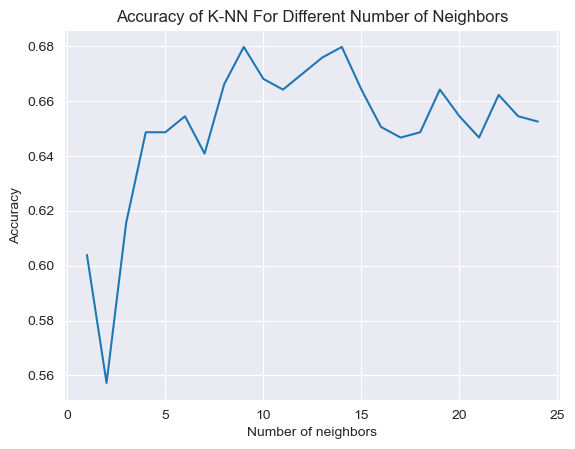

In [181]:
# plotting the accuracy graph of KNN for different values of K
plt.plot([i for i in range(1, 25)], knn_accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of K-NN For Different Number of Neighbors')
plt.show()